In [1]:
import pandas as pd

In [3]:
a=pd.read_csv(r"C:\Users\gisse\Downloads\KnowThyCustomer.csv")

In [4]:
a

,Age,Female,Income,Married,Children,Loan,Mortgage
0,48,1,17546.00,0,1,0,0
1,40,0,30085.10,1,3,1,1
2,51,1,16575.40,1,0,1,0
3,23,1,20375.40,1,3,0,0
4,57,1,50576.30,1,0,0,0
...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1
596,30,1,9672.25,1,0,1,0
597,31,1,15976.30,1,0,1,0
598,29,0,14711.80,1,0,0,1


   Age  Female   Income  Married  Children  Loan  Mortgage
0   48       1  17546.0        0         1     0         0
1   40       0  30085.1        1         3     1         1
2   51       1  16575.4        1         0     1         0
3   23       1  20375.4        1         3     0         0
4   57       1  50576.3        1         0     0         0


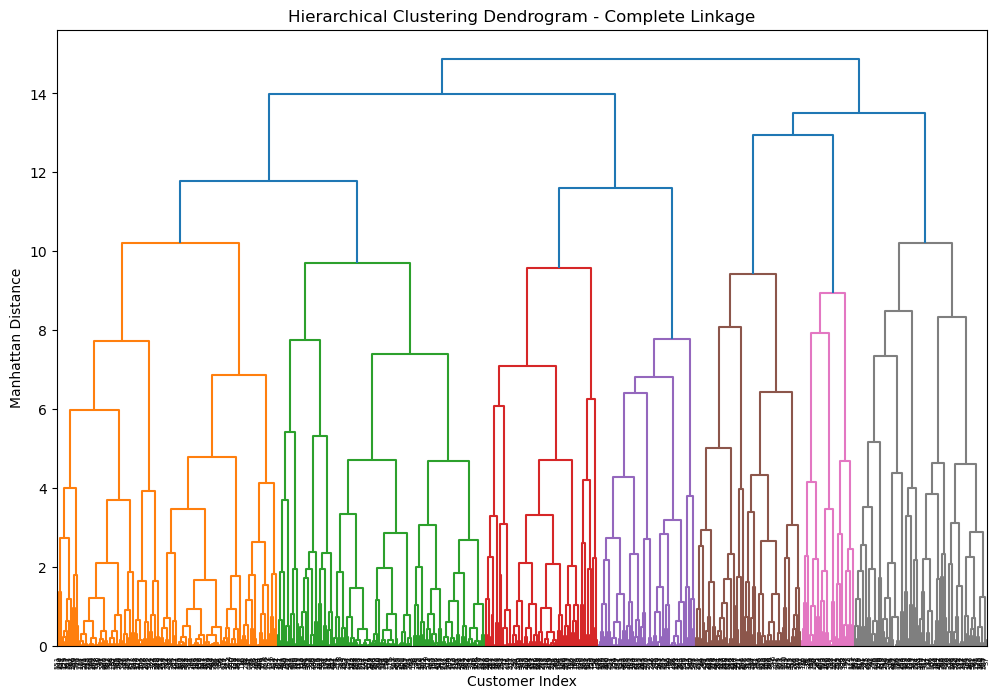

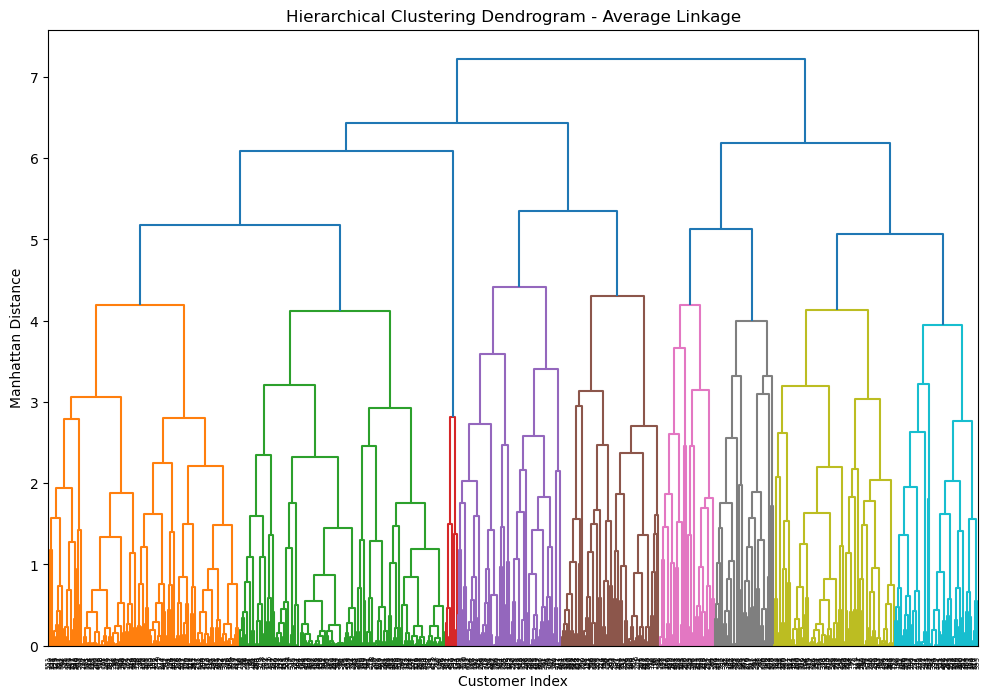

Average Characteristics - Complete Linkage:
                     Age  Female        Income  Married  Children      Loan  \
Cluster_Complete                                                              
1                 42.395     0.5  27524.031217     0.66  1.011667  0.493333   

                  Mortgage  Cluster_Average  
Cluster_Complete                             
1                 0.348333              1.0  

Average Characteristics - Average Linkage:
                    Age  Female        Income  Married  Children      Loan  \
Cluster_Average                                                              
1                42.395     0.5  27524.031217     0.66  1.011667  0.493333   

                 Mortgage  Cluster_Complete  
Cluster_Average                              
1                0.348333               1.0  


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

file_path = r"C:\Users\gisse\Downloads\KnowThyCustomer.csv"
data = pd.read_csv(file_path)

print(data.head())

features = data.iloc[:, 1:]  

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

manhattan_dist = pdist(scaled_data, metric='cityblock')

complete_linkage = linkage(manhattan_dist, method='complete')

average_linkage = linkage(manhattan_dist, method='average')

plt.figure(figsize=(12, 8))
dendrogram(complete_linkage, labels=data.index.values, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram - Complete Linkage')
plt.xlabel('Customer Index')
plt.ylabel('Manhattan Distance')
plt.show()

plt.figure(figsize=(12, 8))
dendrogram(average_linkage, labels=data.index.values, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram - Average Linkage')
plt.xlabel('Customer Index')
plt.ylabel('Manhattan Distance')
plt.show()

threshold = 20  

clusters_complete = fcluster(complete_linkage, threshold, criterion='distance')

clusters_average = fcluster(average_linkage, threshold, criterion='distance')

data['Cluster_Complete'] = clusters_complete
data['Cluster_Average'] = clusters_average

cluster_avg_complete = data.groupby('Cluster_Complete').mean()
cluster_avg_average = data.groupby('Cluster_Average').mean()

print("Average Characteristics - Complete Linkage:")
print(cluster_avg_complete)

print("\nAverage Characteristics - Average Linkage:")
print(cluster_avg_average)

In [10]:
print("Hierarchical clustering might not be good method to use for these seven variables due to the sensitivity of the outliers, and the computational complexity normally for larger data sets.Another reason can be that mixing numerical and categorical variables can mislead cluster interpretation")

Hierarchical clustering might not be good method to use for these seven variables due to the sensitivity of the outliers, and the computational complexity normally for larger data sets.Another reason can be that mixing numerical and categorical variables can mislead cluster interpretation


In [7]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster

subset_variables = data[['Female', 'Married', 'Loan', 'Mortgage']]

matching_dist = pdist(subset_variables, metric='hamming')

group_average_linkage = linkage(matching_dist, method='average')

threshold_a = 0.5  

clusters_part_a = fcluster(group_average_linkage, threshold_a, criterion='distance')

data['Cluster_Part_A'] = clusters_part_a

In [9]:
from sklearn.cluster import KMeans

# Separate the data into four subsets based on clusters from part (a)
subset_1 = data[data['Cluster_Part_A'] == 1]
subset_2 = data[data['Cluster_Part_A'] == 2]
subset_3 = data[data['Cluster_Part_A'] == 3]
subset_4 = data[data['Cluster_Part_A'] == 4]

# Define the variables for k-means clustering in part (b)
kmeans_variables = ['Age', 'Income', 'Children']

# Initialize a dictionary to store results
cluster_results = {}

# Apply k-means clustering with k=2 for each subset
for i, subset in enumerate([subset_1, subset_2, subset_3, subset_4], start=1):
    # Check if subset has enough data for clustering
    if len(subset) > 0:
        # Extract variables and normalize data
        subset_features = subset[kmeans_variables]
        
        # Check for missing values
        if subset_features.isnull().any().any():
            print(f"Warning: Subset {i} contains missing values.")
        else:
            scaler = StandardScaler()
            scaled_subset = scaler.fit_transform(subset_features)
            
            # Apply k-means clustering
            kmeans = KMeans(n_clusters=2, random_state=42)
            subset['Cluster_Part_B_' + str(i)] = kmeans.fit_predict(scaled_subset)
            
            # Store cluster results
            cluster_results['Cluster_Part_B_' + str(i)] = subset.groupby('Cluster_Part_B_' + str(i)).mean()
    else:
        print(f"Warning: Subset {i} is empty and cannot be clustered.")

# Display average characteristics for each cluster
for key, result in cluster_results.items():
    print(f"\nAverage Characteristics - {key}:")
    print(result)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gisse\AppData\Local\Temp\ipykernel_8528\2394164102.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Cluster_Part_B_' + str(i)] = kmeans.fit_predict(scaled_subset)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Average Characteristics - Cluster_Part_B_1:
                        Age  Female        Income   Married  Children  \
Cluster_Part_B_1                                                        
0                 57.415385     1.0  38751.189231  0.607692  1.069231   
1                 33.200000     1.0  19480.916882  0.682353  0.994118   

                      Loan  Mortgage  Cluster_Complete  Cluster_Average  \
Cluster_Part_B_1                                                          
0                 0.507692  0.346154               1.0              1.0   
1                 0.476471  0.294118               1.0              1.0   

                  Cluster_Part_A  
Cluster_Part_B_1                  
0                            1.0  
1                            1.0  

Average Characteristics - Cluster_Part_B_2:
                        Age  Female        Income   Married  Children  \
Cluster_Part_B_2                                                        
0                 31.647399   

C:\Users\gisse\AppData\Local\Temp\ipykernel_8528\2394164102.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Cluster_Part_B_' + str(i)] = kmeans.fit_predict(scaled_subset)


In [14]:
print("For the two step method, the benefits can be that this method segregates the categorical and numerical data, by focusing on specific clustering techniques suited for each data type. Making the clusters more clear.")

For the two step method, the benefits can be that this method segregates the categorical and numerical data, by focusing on specific clustering techniques suited for each data type. Making the clusters more clear.


In [15]:
print("For the two step method, the weaknesses can be that by breaking down the clustering process, some overarching patterns that can be part of both categorical and numerical data can be missed")

For the two step method, the weaknesses can be that by breaking down the clustering process, some overarching patterns that can be part of both categorical and numerical data can be missed
